In [1]:
__file__ = 'erosion_and_dilation.ipynb'
import sys
import pathlib
sys.path.append(str(pathlib.Path(__file__).absolute().parent.parent)+"/FP7_lib")

import functions as f
import os
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from uncertainties import unumpy as up
from uncertainties import ufloat

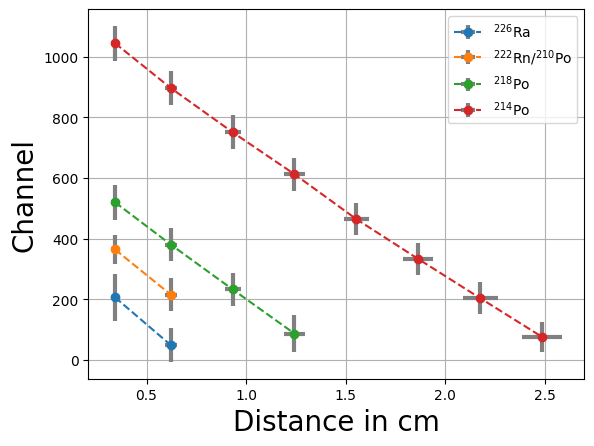

In [2]:
with open("Results/center.txt") as tf:
    data = np.genfromtxt(tf,delimiter="\t",skip_header=1).T
    
Torr = data[0]
Torrin = up.uarray(data[0],np.full(len(data[0]),2.5))
abst = ufloat(6.3,0.25)
for i in range(len(Torrin)):
    Torrin[i] = Torrin[i]*abst/1013.25


    
xerr = up.std_devs(Torrin)
Torr = up.nominal_values(Torrin)

m1 = data[1]
m2 = data[3]
m3 = data[5]
m4 = data[7]
e1 = data[2]
e2 = data[4]
e3 = data[6]
e4 = data[8]

plt.errorbar(Torr,m1,yerr=e1,xerr=xerr,fmt='--o',ecolor='gray', elinewidth=3, capsize=0,label=r'$^{226}$Ra')
plt.errorbar(Torr,m2,yerr=e2,xerr=xerr,fmt='--o',ecolor='gray', elinewidth=3, capsize=0,label=r'$^{222}$Rn/$^{210}$Po')
plt.errorbar(Torr,m3,yerr=e3,xerr=xerr,fmt='--o',ecolor='gray', elinewidth=3, capsize=0,label=r'$^{218}$Po')
plt.errorbar(Torr,m4,yerr=e4,xerr=xerr,fmt='--o',ecolor='gray', elinewidth=3, capsize=0,label=r'$^{214}$Po')




plt.legend()
plt.grid()
plt.ylabel("Channel",fontsize=20)
plt.xlabel("Distance in cm",fontsize=20)
plt.show()

slope:      294.320493 +/- 13.8967443 (4.72%) (init = 295.0317)  
intercept: -1227.52279 +/- 82.7468931 (6.74%) (init = -1232.33)

In [3]:
slope = 1/ufloat(294.320493,13.8967443)
intercept =4.1707

um1 = up.uarray(m1,e1)
um2 = up.uarray(m2,e2)
um3 = up.uarray(m3,e3)
um4 = up.uarray(m4,e4)

um1 = um1*slope+intercept
um2 = um2*slope+intercept
um3 = um3*slope+intercept
um4 = um4*slope+intercept

/home/friedrichjahns/.local/lib/python3.11/site-packages/numpy/lib/function_base.py:2412: RuntimeWarning: invalid value encountered in <lambda> (vectorized)
  outputs = ufunc(*inputs)


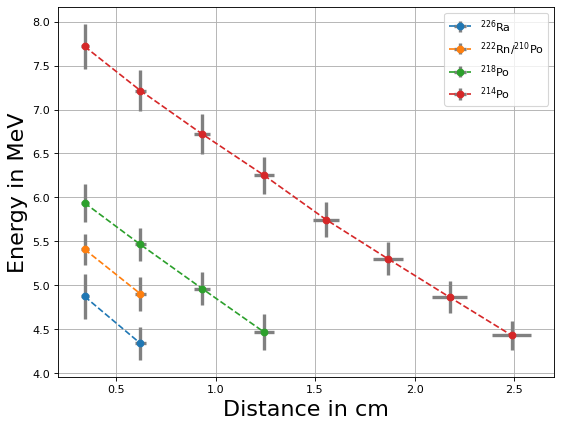

In [4]:
m1 = up.nominal_values(um1)
m2 = up.nominal_values(um2)
m3 = up.nominal_values(um3)
m4 = up.nominal_values(um4)

e1 = up.std_devs(um1)
e2 = up.std_devs(um2)
e3 = up.std_devs(um3)
e4 = up.std_devs(um4)

plt.figure(figsize=(8,6),dpi=80,linewidth=50)
plt.errorbar(Torr,m1,yerr=e1,xerr=xerr,fmt='--o',ecolor='gray', elinewidth=3, capsize=0,label=r'$^{226}$Ra')
plt.errorbar(Torr,m2,yerr=e2,xerr=xerr,fmt='--o',ecolor='gray', elinewidth=3, capsize=0,label=r'$^{222}$Rn/$^{210}$Po')
plt.errorbar(Torr,m3,yerr=e3,xerr=xerr,fmt='--o',ecolor='gray', elinewidth=3, capsize=0,label=r'$^{218}$Po')
plt.errorbar(Torr,m4,yerr=e4,xerr=xerr,fmt='--o',ecolor='gray', elinewidth=3, capsize=0,label=r'$^{214}$Po')

plt.ylabel("Energy in MeV",fontsize=20)
plt.xlabel("Distance in cm",fontsize=20)
plt.legend()
plt.grid()
plt.savefig('Results/Energyloss_over_distance.pdf')
plt.show()

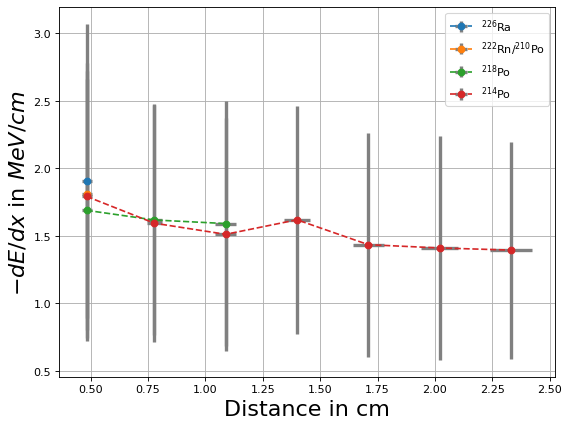

In [5]:
diff1 = f.wrappeddiff(um1,Torrin)
diff2 = f.wrappeddiff(um2,Torrin)
diff3 = f.wrappeddiff(um3,Torrin)
diff4 = f.wrappeddiff(um4,Torrin)
plt.figure(figsize=(8,6),dpi=80,linewidth=50)
plt.errorbar(x=up.nominal_values(diff1[0]),y=up.nominal_values(diff1[1]),xerr=up.std_devs(diff1[0]),yerr=up.std_devs(diff1[1]),fmt='--o',ecolor='gray', elinewidth=3, capsize=0,label=r'$^{226}$Ra')
plt.errorbar(x=up.nominal_values(diff2[0]),y=up.nominal_values(diff2[1]),xerr=up.std_devs(diff2[0]),yerr=up.std_devs(diff2[1]),fmt='--o',ecolor='gray', elinewidth=3, capsize=0,label=r'$^{222}$Rn/$^{210}$Po')
plt.errorbar(x=up.nominal_values(diff3[0]),y=up.nominal_values(diff3[1]),xerr=up.std_devs(diff3[0]),yerr=up.std_devs(diff3[1]),fmt='--o',ecolor='gray', elinewidth=3, capsize=0,label=r'$^{218}$Po')
plt.errorbar(x=up.nominal_values(diff4[0]),y=up.nominal_values(diff4[1]),xerr=up.std_devs(diff4[0]),yerr=up.std_devs(diff4[1]),fmt='--o',ecolor='gray', elinewidth=3, capsize=0,label=r'$^{214}$Po')

plt.xlabel("Distance in cm",fontsize=20)
plt.ylabel(r'$-dE/dx$'" in "r'$MeV/cm$',fontsize=20)
plt.grid()
plt.legend()
plt.savefig('Results/Energyloss_per_distance.pdf')